# (prosperLoanData)
## by Ahmed Serwah

is the employment status affect the amount of loans ?

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
#read_csv
df=pd.read_csv('prosperLoanData.csv')

In [3]:
#basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
#strucrue of the data
df.shape

(113937, 81)

In [5]:

#check for duplicated values
df.duplicated().sum()

0

In [6]:

#REPLACE EstimatedEffectiveYield WITH THE MEAN
df['EstimatedEffectiveYield'].fillna(value=df['EstimatedEffectiveYield'].mean(),inplace=True)

In [7]:

#substract dartframe into the interest columns 
colums=['Investors','LoanStatus','BorrowerAPR','Occupation','EmploymentStatus','Term','IncomeRange','BorrowerState','Investors']
new_df= df[colums]


In [8]:
#check the data frame
new_df.head()

,Investors,LoanStatus,BorrowerAPR,Occupation,EmploymentStatus,Term,IncomeRange,BorrowerState,Investors
0,258,Completed,0.16516,Other,Self-employed,36,"$25,000-49,999",CO,258
1,1,Current,0.12016,Professional,Employed,36,"$50,000-74,999",CO,1
2,41,Completed,0.28269,Other,Not available,36,Not displayed,GA,41
3,158,Current,0.12528,Skilled Labor,Employed,36,"$25,000-49,999",GA,158
4,20,Current,0.24614,Executive,Employed,36,"$100,000+",MN,20


In [9]:

#summary stat
new_df.describe()

,Investors,BorrowerAPR,Term,Investors
count,113937.000000,113912.000000,113937.000000,113937.000000
mean,80.475228,0.218828,40.830248,80.475228
std,103.239020,0.080364,10.436212,103.239020
min,1.000000,0.006530,12.000000,1.000000
25%,2.000000,0.156290,36.000000,2.000000
50%,44.000000,0.209760,36.000000,44.000000
75%,115.000000,0.283810,36.000000,115.000000
max,1189.000000,0.512290,60.000000,1189.000000





### What is the structure of your dataset?

there is 113937 rows and 81 variables 
### What is/are the main feature(s) of interest in your dataset?

the relation between the EmploymentStatus and the loan status 
number of investors and the LoanStatus 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

the income range and employment stauts 

## Univariate Exploration


# what is the borrower current emoplyment status?

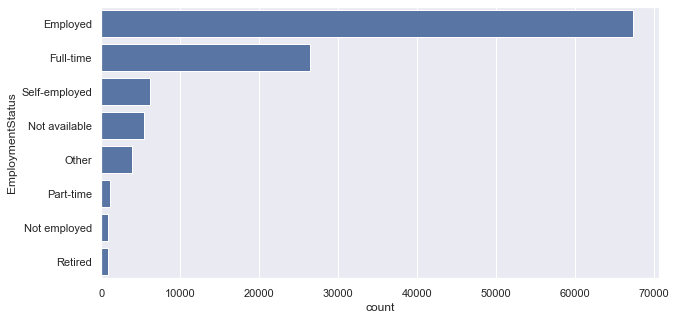

In [10]:
# bar chart for qualitative data
plt.figure(figsize = [10, 5]) 
#set the theme to make the viz  better 
sb.set_theme(style='darkgrid')
order=df['EmploymentStatus'].value_counts().index
color=sb.color_palette()[0]
sb.countplot(data=df,y='EmploymentStatus',order=order,color=color);


 bar chart for EmploymentStatus to clearfy how many people that have loans wheather they employed or unemployed
 


# What is the  status of loans?

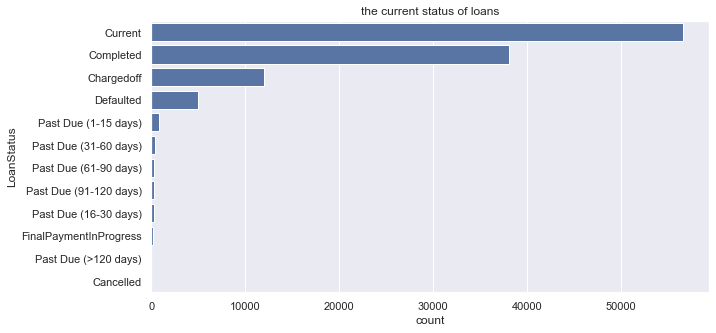

In [11]:

#create a bar chart for LoanStatus
plt.figure(figsize = [10, 5]) 
sb.set_theme(style='darkgrid')
order=df['LoanStatus'].value_counts().index
color=sb.color_palette()[0]
sb.countplot(data=df,y='LoanStatus',order=order,color=color);
plt.title('the current status of loans');

it seems the  most loans in the current condition

# what is the most income range?

In [12]:

#create an updated data frame that shows only working employeed 
df_1 = df[df['IncomeRange'] != 'Not employed']

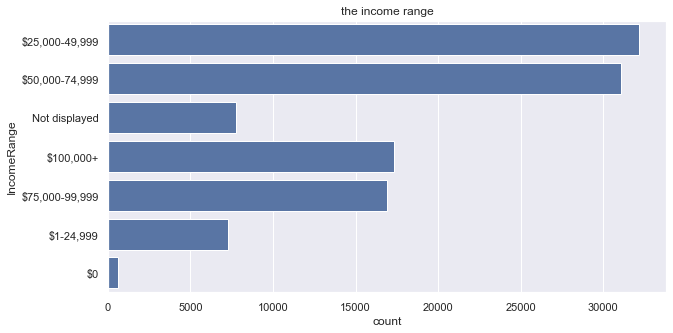

In [13]:
plt.figure(figsize = [10, 5]) 
sb.set_theme(style='darkgrid')
color=sb.color_palette()[0]
sb.countplot(data=df_1,y='IncomeRange',color=color);
plt.title('the income range');

In [14]:
df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

# what is the top borrowers states ?

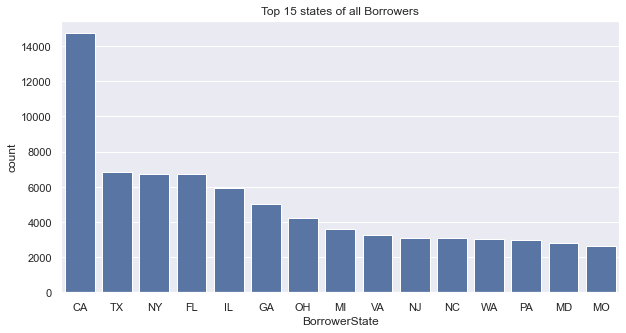

In [15]:

plt.figure(figsize = [10, 5]) 
sb.set_theme(style='darkgrid')
order=df['BorrowerState'].value_counts().head(15).index
color=sb.color_palette()[0]
sb.countplot(data=df,x='BorrowerState',order=order,color=color);
plt.title("Top 15 states of all Borrowers");








based on data
california is the highest with number of more than 14000 person 


# what is the top Occupation of the borrowers ?

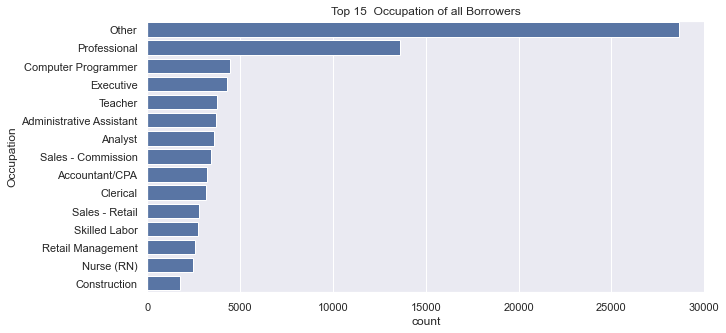

In [16]:

plt.figure(figsize = [10, 5]) 
base_color = sb.color_palette()[0]
order=df['Occupation'].value_counts().index
order=df['Occupation'].value_counts().head(15).index 
sb.countplot(data = df, y = 'Occupation', color = base_color,
             order = order);
plt.title("Top 15  Occupation of all Borrowers");

# what is the range of BorrowerRate 

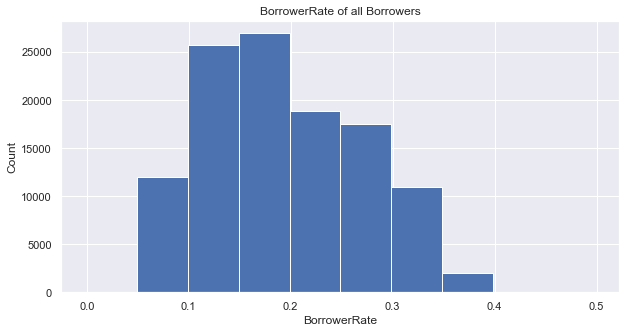

In [17]:
#hist for quantaitive data 
plt.figure(figsize = [10, 5]) 
plt.hist(data = df, x = 'BorrowerRate');
plt.xlabel('BorrowerRate');
plt.ylabel('Count');
plt.title("BorrowerRate of all Borrowers");



the majority of borrowers have a rate between 0.1 to 0.2 and less likely to be 0.4 or 0.1 ane there is no observation to be higher than 0.4 or 0.0


# what is the range ofTerm ?

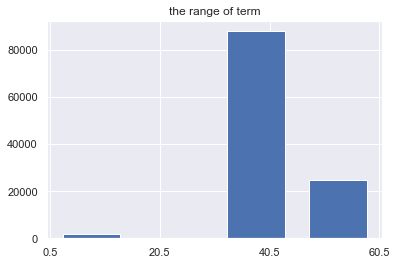

In [18]:

bin_edges = np.arange(0.5, df['Term'].max()+15, 15)
plt.hist(data=df, x='Term', bins = bin_edges, rwidth = 0.7)
plt.xticks(np.arange(0.5, df['Term'].max()+10, 20));
plt.title('the range of term');

# does the income range affect on borrrowerAPR and term period ?

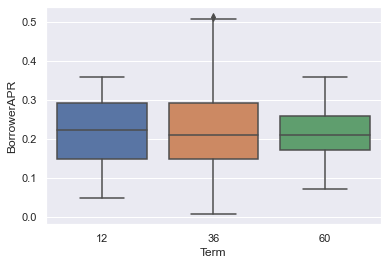

In [25]:
sb.boxplot(data=df, y='BorrowerAPR', x='Term');



most of loans is worthy of payment in 36 month(3 years) to 40 month

In [26]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Investors         113937 non-null  int64  
 1   LoanStatus        113937 non-null  object 
 2   BorrowerAPR       113912 non-null  float64
 3   Occupation        110349 non-null  object 
 4   EmploymentStatus  111682 non-null  object 
 5   Term              113937 non-null  int64  
 6   IncomeRange       113937 non-null  object 
 7   BorrowerState     108422 non-null  object 
 8   Investors         113937 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 7.8+ MB


## Bivariate Exploration


#  relationship between Term and IncomeRange

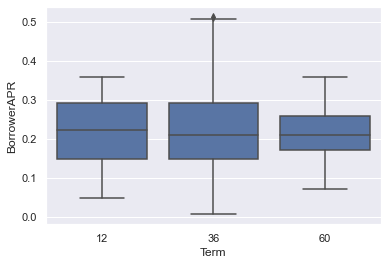

In [27]:
base_color = sb.color_palette()[0]
sb.boxplot(data=df ,y='BorrowerAPR', x='Term',color=base_color);


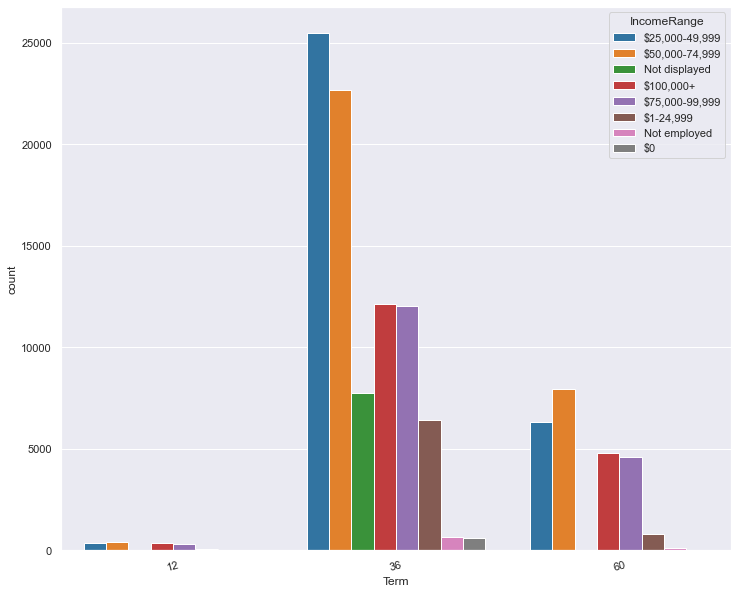

In [28]:
plt.figure(figsize = [12, 10])
sb.countplot(data = df, x = 'Term', hue = 'IncomeRange', palette = 'tab10')
plt.xticks(rotation = 15);

# does the income range affect on borrrowerAPR and term period ?

it seems that people with income range above 250000 is tend to have loans worth to pay in 36 month 

# is there is a relationship EmploymentStatus between Term and IncomeRange

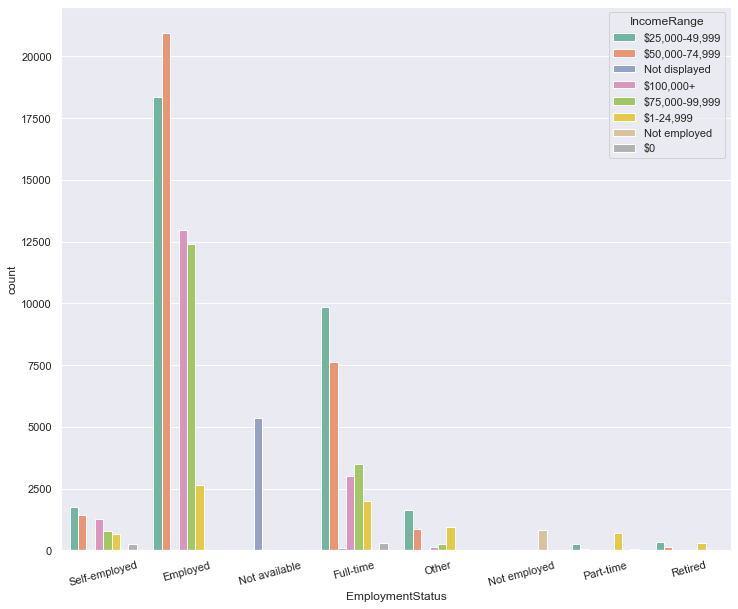

In [29]:
plt.figure(figsize = [12, 10])
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'IncomeRange', palette = 'Set2')
plt.xticks(rotation = 15);

most of employees have an income range between 50000 to 750000

# is there is a relationship between  LoanStatus,Term and IncomeRange


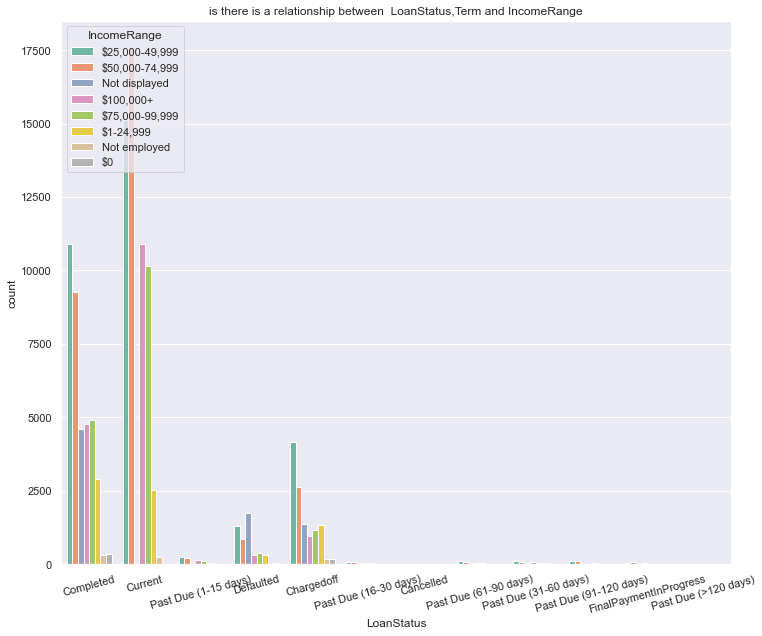

In [30]:
plt.figure(figsize = [12, 10])
sb.countplot(data = df, x = 'LoanStatus', hue = 'IncomeRange', palette = 'Set2')
plt.xticks(rotation = 15);
plt.title('is there is a relationship between  LoanStatus,Term and IncomeRange');

most of current loans borrwores have an income range between 50000 to 75000

## Multivariate Exploration


### does the increase of the term leads to increase higher amount of loans ?

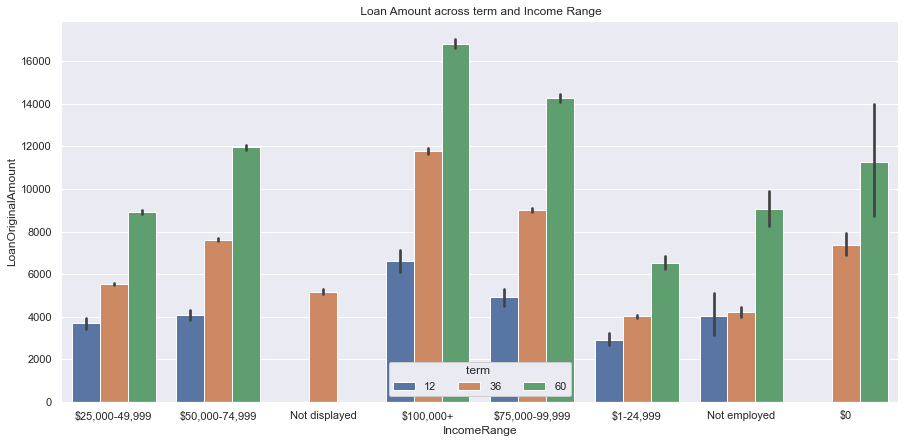

In [31]:

plt.figure(figsize = [15, 7])
ax = sb.barplot(data = df, x = 'IncomeRange', y = 'LoanOriginalAmount', hue = 'Term')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'term ')
plt.title(' Loan Amount across term and Income Range');

# insights

the loans extremly depend on the income range and employment status 
while the term increase the amount of loans increase (3 year is a enough period) 
